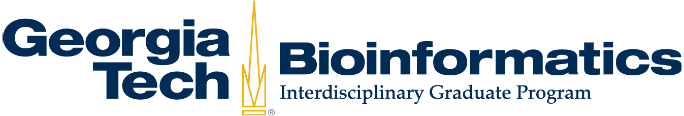

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Variant Calling) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 6th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 5 + 5 + 30 + 45 + 20 + 45 = 150*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check your SAM file</h3>
    <p>We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
</div>

In [9]:
#Check you SAM file here.
!wc -l ~/biol6150/ProjectSubmissions/Group14-Peaches/Project2/SRRsortednew.sam

26216378 /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project2/SRRsortednew.sam


<div class="alert alert-block alert-warning">
    <h3>1.2 Check your SAM file</h3>
    <p>Show that your SAM file is sorted</p>
</div>

In [10]:
#Show that your SAM file is sorted by genomic coordinates.
!head -5  ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRRsortednew.sam 

@HD	VN:1.6	SO:coordinate
@SQ	SN:SRR029902.282	LN:49
@SQ	SN:SRR029902.283	LN:49
@SQ	SN:SRR029902.284	LN:49
@SQ	SN:SRR029902.285	LN:49


In [ ]:
#This is a repeat from last project, but we want to check the sorted file again.


<div class="alert alert-block alert-warning">
    <h3>1.3 The pieleup format</h3>
    <p><b>1.3.1</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>1.3.2</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>

In [4]:
#Information about the pileup format.
Pileup format is a bioinformatics text format that shows how sequencing reads match a reference sequence at 
specific positions. Its useful for tasks like finding genetic differences (SNPs) and identifying insertions or 
deletions in the genome.

In [6]:
#Information about the 6 fields of the pieleup format file.
The six fields include sequence, position, reference base, read counts, read outcomes, and quality.

#Write one sentence for each file.
Sequence: Identifies the chromosome where the position is located.
Position: Specifies the position on that chromosome.
Reference Base: Indicates the base at that specific position on the reference sequence.
Read Counts: Reflects the number of reads covering this position.
Read Outcomes: Depicts the bases at this position within the reads. A match to the reference sequence is denoted by ".", "," for a match on the reverse strand, while substitutions are represented using uppercase ACGTN for the forward strand and lowercase for the reverse strand.
Quality: Represents the base quality for each base, encoded as ASCII characters.


<div class="alert alert-block alert-warning">
    <h3>1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [8]:
!mkdir variantcalling
!cp ~/biol6150/ProjectSubmissions/Group14-Peaches/Project2/SRR029902new.sam ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3
!cp ~/biol6150/ProjectSubmissions/Group14-Peaches/Project2/hg38.fa ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/hg38.fa

In [22]:
!ls -lh

total 4.8G
-rw------- 1 hpatil39 gtperson 1.9G Nov  6 18:38 hg38.fa
-rw-r--r-- 1 hpatil39 gtperson 2.2K Nov  6 18:40 hg38.fa.fai
-rw-r--r-- 1 hpatil39 gtperson  72M Nov  6 18:44 Project3-VariantCalling.ipynb
-rw-r--r-- 1 hpatil39 gtperson  43M Nov  6 18:46 SRR029902.mpileup
-rw-r--r-- 1 hpatil39 gtperson 629M Nov  6 18:35 SRRsortednew.bam
-rw-r--r-- 1 hpatil39 gtperson 2.2G Nov  6 18:35 SRRsortednew.sam
drwxr-xr-x 3 hpatil39 gtperson 4.0K Nov  6 17:39 variantcalling


In [29]:
#Your command for pileup here.
!samtools mpileup -f ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/hg38.fa ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRRsortednew.sam > SRR029902.mpileup

In [27]:
#Show the first 10 lines of the Pileup file.
!head -10  ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.mpileup

SRR029902.293	2	N	1	^*c	?
SRR029902.293	3	N	1	a	A
SRR029902.293	4	N	1	t	B
SRR029902.293	5	N	1	g	B
SRR029902.293	6	N	1	a	A
SRR029902.293	7	N	1	g	@
SRR029902.293	8	N	1	t	>
SRR029902.293	9	N	1	c	5
SRR029902.293	10	N	1	a	9
SRR029902.293	11	N	1	t	B


In [23]:
#Show the 10,000 - 10,010 lines of the Pileup file.
!head ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.mpileup -n10010 | tail

SRR029902.11861	22	N	1	G	@
SRR029902.11861	23	N	1	A	=
SRR029902.11861	24	N	1	G	8
SRR029902.11861	25	N	1	G	A
SRR029902.11861	26	N	1	C	@
SRR029902.11861	27	N	1	A	=
SRR029902.11861	28	N	1	G	?
SRR029902.11861	29	N	1	G	>
SRR029902.11861	30	N	1	A	2
SRR029902.11861	31	N	1	G	@


In [18]:
#Show the 200,000 - 200,010 lines of the Pileup file.
!head ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.mpileup -n200010 | tail

SRR029902.226911	44	N	1	C	=
SRR029902.226911	45	N	1	T	B
SRR029902.226911	46	N	1	A	@
SRR029902.226911	47	N	1	T	?
SRR029902.226911	48	N	1	G	8
SRR029902.226911	49	N	1	A$	>
SRR029902.226967	1	N	1	^!a	;
SRR029902.226967	2	N	2	c^!c	;8
SRR029902.226967	3	N	2	tt	;=
SRR029902.226967	4	N	2	gg	A@


<div class="alert alert-block alert-warning">
    <h3>1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [28]:
#Show the 100,000th entry here.
!sed -n "100000p" SRR029902.mpileup

SRR029902.112739	25	N	1	T	B


In [10]:
#Explain the entry here.
SRR029902.112739: Unique identifier for the sequence read.
25: Mapping quality, indicating how well the read aligns to a reference sequence.
N: Reference sequence (chromosome) to which the read is aligned.
1: Position on the reference sequence where the read aligns.
T: Alignment details, possibly related to insertions or deletions.
B: Additional information specific to the alignment or data format.

<div class="alert alert-block alert-warning">
    <h3>1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

In [49]:
#An awk command can help you create a file with just the information for chr20.
!awk '$1 == "chr20"' ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.mpileup > chr20.pileup

In [ ]:
#Plot your graph and show it here (matplotlib/seaborn)
import matplotlib.pyplot as plt


In [51]:
loc = []
counts = []
with open('chr20.pileup', 'r') as pileup_file:
    for l in file:
        parts = l.split()
        loc.append(parts[1])
        counts.append(parts[3]) 

In [ ]:
# Creating the graph
plt.plot(loc, counts, marker='.', linestyle='-', color='b')
plt.xlabel('loc on Chr 20')
plt.ylabel('Count')
plt.title('count vs. loc on Chr 20')
plt.grid(True)
plt.show()

# **2. Variant calling**
### *Total Questions: 3*
### *Total Points: 50+30+10+40 = 130*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>2.1.1</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>2.1.2</b> Informed decision.</p>
</div>

In [38]:
#Use VarScan for calling variants. Look up the appropriate command for this.
!varscan mpileup2snp ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.mpileup --min-reads2 10 --output-vcf > ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	10
Min var freq:	0.2
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.mpileup
SRR029902.3940325	1	



In [18]:
#Make an informed decision (based on section 1) about the parameters used for calling the variants.
#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.
--min-coverage 8: Include only positions with a coverage of at least 8 times to ensure reliability.
--min-reads2 10: Demand a minimum of 10 supporting reads to make a variant call.
--min-avg-qual 15: Establish a minimum average base quality threshold.
--min-var-freq 0.2: Limit variant calls to those with a minimum allele frequency of 20%.
--output-vcf: Generate results in VCF format.

<div class="alert alert-block alert-warning">
    <h3>2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

In [30]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.
!bcftools view -R 20800000:30800000 ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf

In [29]:
#There could be multiple variants in this range, please select one.


In [21]:
#The information is there in your VCF file.


<div class="alert alert-block alert-warning">
    <h3>2.3 How many indels do you have in your VCF file?</p>
</div>

In [16]:
#Same as above, there are multiple ways of doing this.
!cp ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.copy.vcf

!bgzip -c ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf > ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf.gz

!bcftools index ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf.gz


In [18]:
#Write your command and show the number of indels.
!bcftools stats -c indels ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf.gz

# This file was produced by bcftools stats (1.17+htslib-1.18) and can be plotted using plot-vcfstats.
# The command line was:	bcftools stats  -c indels /home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf.gz
#
# Definition of sets:
# ID	[2]id	[3]tab-separated file names
ID	0	/home/hice1/hpatil39/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf.gz
# SN, Summary numbers:
#   number of records   .. number of data rows in the VCF
#   number of no-ALTs   .. reference-only sites, ALT is either "." or identical to REF
#   number of SNPs      .. number of rows with a SNP
#   number of MNPs      .. number of rows with a MNP, such as CC>TT
#   number of indels    .. number of rows with an indel
#   number of others    .. number of rows with other type, for example a symbolic allele or
#                          a complex substitution, such as ACT>TCGA
#   number of multiallelic sites     .. number of rows with multiple alternate alleles
#   nu

<div class="alert alert-block alert-warning">
    <h3>2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>2.4.1</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>2.4.2</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [29]:
#Select the variant.


In [20]:
!bcftools view -r chr2:203000000-230000000 ~/biol6150/ProjectSubmissions/Group14-Peaches/Project3/SRR029902.vcf.gz

##fileformat=VCFv4.3
##FILTER=<ID=PASS,Description="All filters passed">
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORM

In [21]:
#Variation observed and number of copies for reference allele.


In [27]:
#Number of reads supporting the ref & alt allele.


# **3. Filtering**
### *Total Questions: 1*
### *Total Points: 20 = 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

In [56]:
!head SRR029902.vcf

##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
